# Random Signals - Mateusz Kliś
## Variant 5

In [7]:
# importing libraries

import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from numpy.random import Generator, PCG64
from scipy import signal
from scipy import stats

In [8]:
# Declaring parameters

f = 300
A = 300.25
B = 299.75
N = 2000

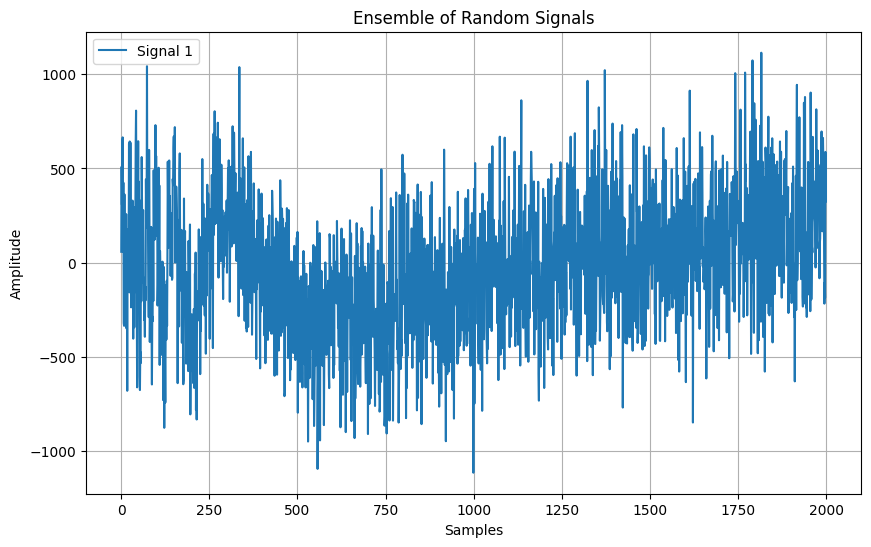

In [3]:
# Generate ensemble of random signals
ensemble_signals = []

W = np.random.normal(0, 1, N)
k = np.arange(1, N + 1)
xn = A * np.cos(2 * np.pi * f / k) + B * W
ensemble_signals.append(xn)

# Plot the ensemble of signals
plt.figure(figsize=(10, 6))
for i, signal in enumerate(ensemble_signals):
    plt.plot(signal, label=f'Signal {i+1}')

plt.title('Ensemble of Random Signals')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()
plt.close()

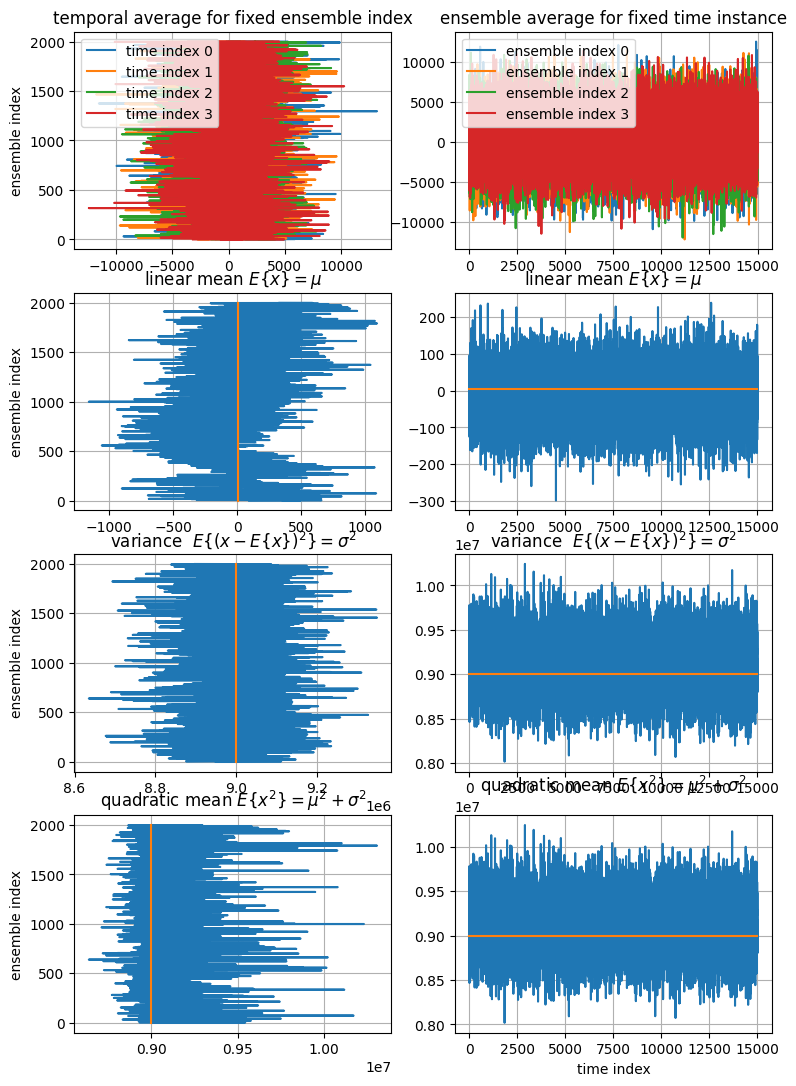

In [4]:
# Parameters
Ns = N  # number of samples to set up an ensemble
Nt = 15000  # number of time steps to set up 'ensemble over time'-characteristics

s = np.arange(Ns)  # ensemble index (s to indicate sample function)
t = np.arange(Nt)  # time index

loc, scale = 5, 3000  # mu, sigma

np.random.seed(1)

# Generate random data
x = np.random.normal(loc=loc, scale=scale, size=[Ns, Nt])

# Add a sinusoidal component to the random data
x = x + np.transpose(np.tile(xn, (Nt, 1)))

# Create subplots
fig, axs = plt.subplots(4, 2, figsize=(9, 13))

# Plot signals
for i in range(4):
    axs[0, 0].plot(x[:, i], s, label='time index '+str(i))
    axs[0, 1].plot(t, x[i, :], label='ensemble index '+str(i))

# Plot means
axs[1, 0].plot(np.mean(x, axis=1), s)
axs[1, 1].plot(t, np.mean(x, axis=0))
axs[1, 0].plot([loc, loc], [0, Ns])
axs[1, 1].plot([0, Nt], [loc, loc])

# Plot variance
axs[2, 0].plot(np.var(x, axis=1), s)
axs[2, 1].plot(t, np.var(x, axis=0))
axs[2, 0].plot([scale**2, scale**2], [0, Ns])
axs[2, 1].plot([0, Nt], [scale**2, scale**2])

# Plot quadratic mean
axs[3, 0].plot(np.mean(x**2, axis=1), s)
axs[3, 1].plot(t, np.mean(x**2, axis=0))
axs[3, 0].plot([loc**2+scale**2, loc**2+scale**2], [0, Ns])
axs[3, 1].plot([0, Nt], [loc**2+scale**2, loc**2+scale**2])

# Labeling
axs[3, 1].set_xlabel('time index')
for i in range(4):
    axs[i, 0].set_ylabel('ensemble index')
    for j in range(2):
        axs[i, j].grid(True)
axs[0, 0].set_title(r'temporal average for fixed ensemble index')
axs[0, 1].set_title(r'ensemble average for fixed time instance')
for i in range(2):
    axs[0, i].legend(loc='upper left')
    axs[1, i].set_title(r'linear mean $E\{x\} = \mu$')
    axs[2, i].set_title(r'variance  $E\{(x -E\{x\} )^2\} = \sigma^2$')
    axs[3, i].set_title(r'quadratic mean $E\{x^2\} = \mu^2+\sigma^2$')


# Show plots
plt.show()

In [5]:
from scipy import signal

def my_xcorr(x, y):
    # Custom cross-correlation function using SciPy's signal.correlate
    N, M = len(x), len(y)
    kappa = np.arange(N+M-1) - (M-1)
    ccf = signal.correlate(x, y, mode='full', method='auto')
    return kappa, ccf

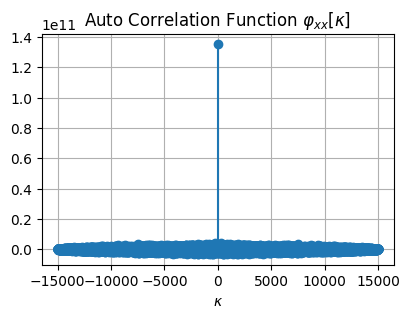

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
kappa, ccf = my_xcorr(x[0, :], x[0, :])
plt.stem(kappa, ccf, basefmt='C0:')
plt.xlabel(r'$\kappa$')
plt.title(r'Auto Correlation Function $\varphi_{xx}[\kappa]$')
plt.grid(True)
plt.show()
